# Final Project Week 1

## SPAdes Assembly

The command line input below runs `SPAdes` and outputs to the Lab 8 directory the result of taking the short reads from `/bigdata/FinalProject_data/190724_SARA_Genomes/SARA_4_S27_L004_R1_001.fastq.gz` and `/bigdata/FinalProject_data/190724_SARA_Genomes/SARA_4_S27_L004_R2_001.fastq.gz`. The result is an assembled genome. `-o .` indicates the output should be in the current directory. `-1` indicates the first short paired-end Illumina read, and likewise for `-2`. `-t 1` is used to ensure that only a single core is used. `-m 16` is used to cap memory usage at 16GB.

`spades.py -o . -1 /bigdata/FinalProject_data/190724_SARA_Genomes/SARA_4_S27_L004_R1_001.fastq.gz -2 /bigdata/FinalProject_data/190724_SARA_Genomes/SARA_4_S27_L004_R2_001.fastq.gz -t 1 -m 16`

We then ran `rna_hmm3.py` on the assembled contigs to locate rRNA genes. The `-i` option gives the input `contigs.fasta`, `-o` writes the output to `contigs.rna.gff`, and -L gives the path to the HMM database `/data/Lab9_data/HMM3`. 

`rna_hmm3.py -i contigs.fasta -o contigs.rna.gff -L /data/Lab9_data/HMM3`

Afterwards, we deleted the lines from `contigs.rna.gff` that did not include 16S rRNA genes. We then proceeded to run the following command to extract nucleic acid sequences of the 16S rRNA genes from the assembly. The input FASTA file `contigs.fasta` is specified with `-fi`, the input GFF file `contigs.rna.gff` is specified with `-bed`, and the output is piped to `contigs.rna.fasta`.

`bedtools getfasta -fi contigs.fasta -bed contigs.rna.gff > contigs.rna.fasta`

Note: there was no index file for `contigs.fasta`, so we observed the following message in the console.

`index file contigs.fasta.fai not found, generating...`

## SeqMatch

Next, we uploaded `contigs.rna.fasta` to SeqMatch in order to discover to which taxon the genome belongs to. That is, we uploaded the extracted nucleic acid sequences of the 16S rRNA genes from the assembly. The three features - `NODE_141_length_94_cov_471.512821:43-94`, `NODE_81_length_493_cov_728.349315:0-53`, and `NODE_62_length_1697_cov_1712.989647:9-1559` - all mapped to domain Bacteria, phylum "Proteobacteria", order "Enterobacteriales", and family Enterobacteriaceae. In particular, the last feature `NODE_62_length_1697_cov_1712.989647:9-1559` was found to map to genus Salmonella. Since we were not given additional information on the genome, we were not sure which particular strain we expected. However, *Salmonella enterica* was the species-level indentification that SeqMatch suggested, based on the matches for ` NODE_62_length_1697_cov_1712.989647:9-1559`.

## Assembly Statistics

Running `assembly-stats` as follows produced the asssembly statistics for `contigs.fasta` and `scaffolds.fasta` - the results of the assembly - respectively.

`
assembly-stats contigs.fasta`

`
stats for contigs.fasta
sum = 4969745, n = 175, ave = 28398.54, largest = 520439
N50 = 222574, n = 9
N60 = 149857, n = 11
N70 = 90461, n = 16
N80 = 73794, n = 21
N90 = 47967, n = 30
N100 = 56, n = 175
N_count = 0
Gaps = 0`

`
assembly-stats scaffolds.fasta
`

`
stats for scaffolds.fasta
sum = 4970480, n = 167, ave = 29763.35, largest = 520439
N50 = 225547, n = 8
N60 = 200993, n = 10
N70 = 143389, n = 13
N80 = 90461, n = 18
N90 = 57690, n = 24
N100 = 56, n = 167
N_count = 800
Gaps = 8
`

## N50
Given the output from `assembly-stats` for each `.fasta` file, the `N50` for `contigs.fasta` is `222574` and the `N50` for `scaffolds.fasta` is `225547`.

## Histogram of Contig Lengths

The code below generates a histogram of contig lengths based on `contigs.fasta`. Additionally, a brief analysis is provided.

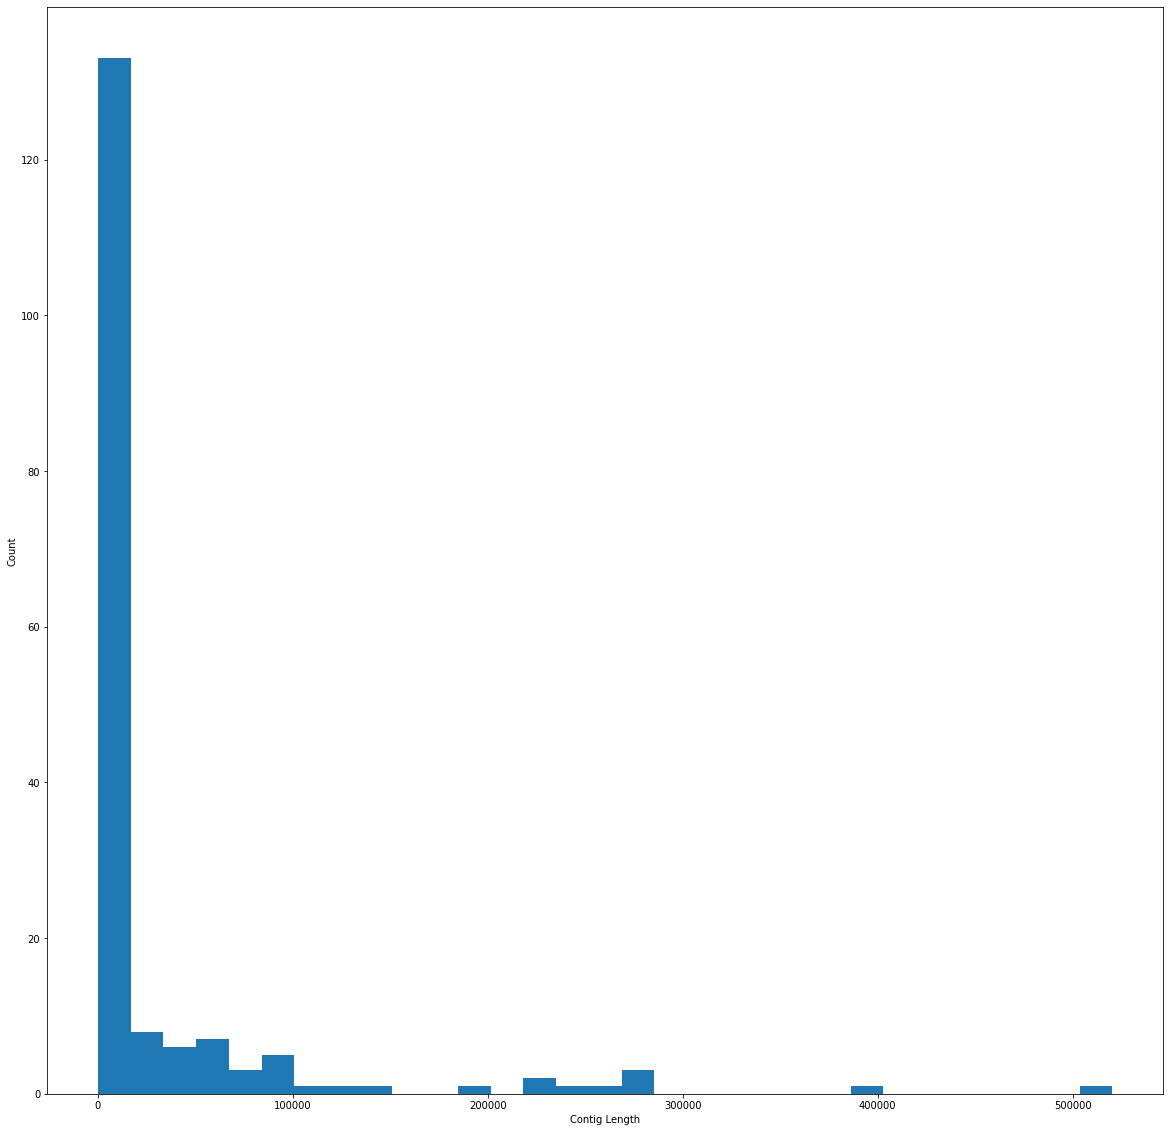

In [18]:
%matplotlib inline
from matplotlib import pyplot as plt

with open("contigs.fasta") as contigs:
    contigs_lengths = []
    for line in contigs:
        if line.startswith('>'):
            fields = line.split('_')
            contig_length = int(fields[3])
            contigs_lengths.append(contig_length)

plt.figure(figsize = [20,20])
NUM_BINS = 31
plt.hist(contigs_lengths, bins=NUM_BINS)
plt.xlabel("Contig Length")
plt.ylabel("Count")
plt.show()

From the histogram, we can see that the vast majority of the contigs are relatively short (less than 20000bp). The distribution is fairly sparse otherwise, with a handful of outliers of length approximately 400000bp and 500000bp. This is rather unsurprising, as we would predict most of the contigs would be smaller and therefore produce a right-skewed distribution.

## RAST Annotation & Analysis

We uplaoded /bigdata/FinalProject_data/contigs.fasta to the genome annotation service RAST, utilizing the SEED Viewer provided by RAST to analyze the genome. Below are some a few segments of the resulting table, showing the annotations of types CRISPR_ARRAY, CRISPR_REPEAT, CRISPR_SPACER, CDS (the coding sequence of the gene), REPEAT, and RNA.

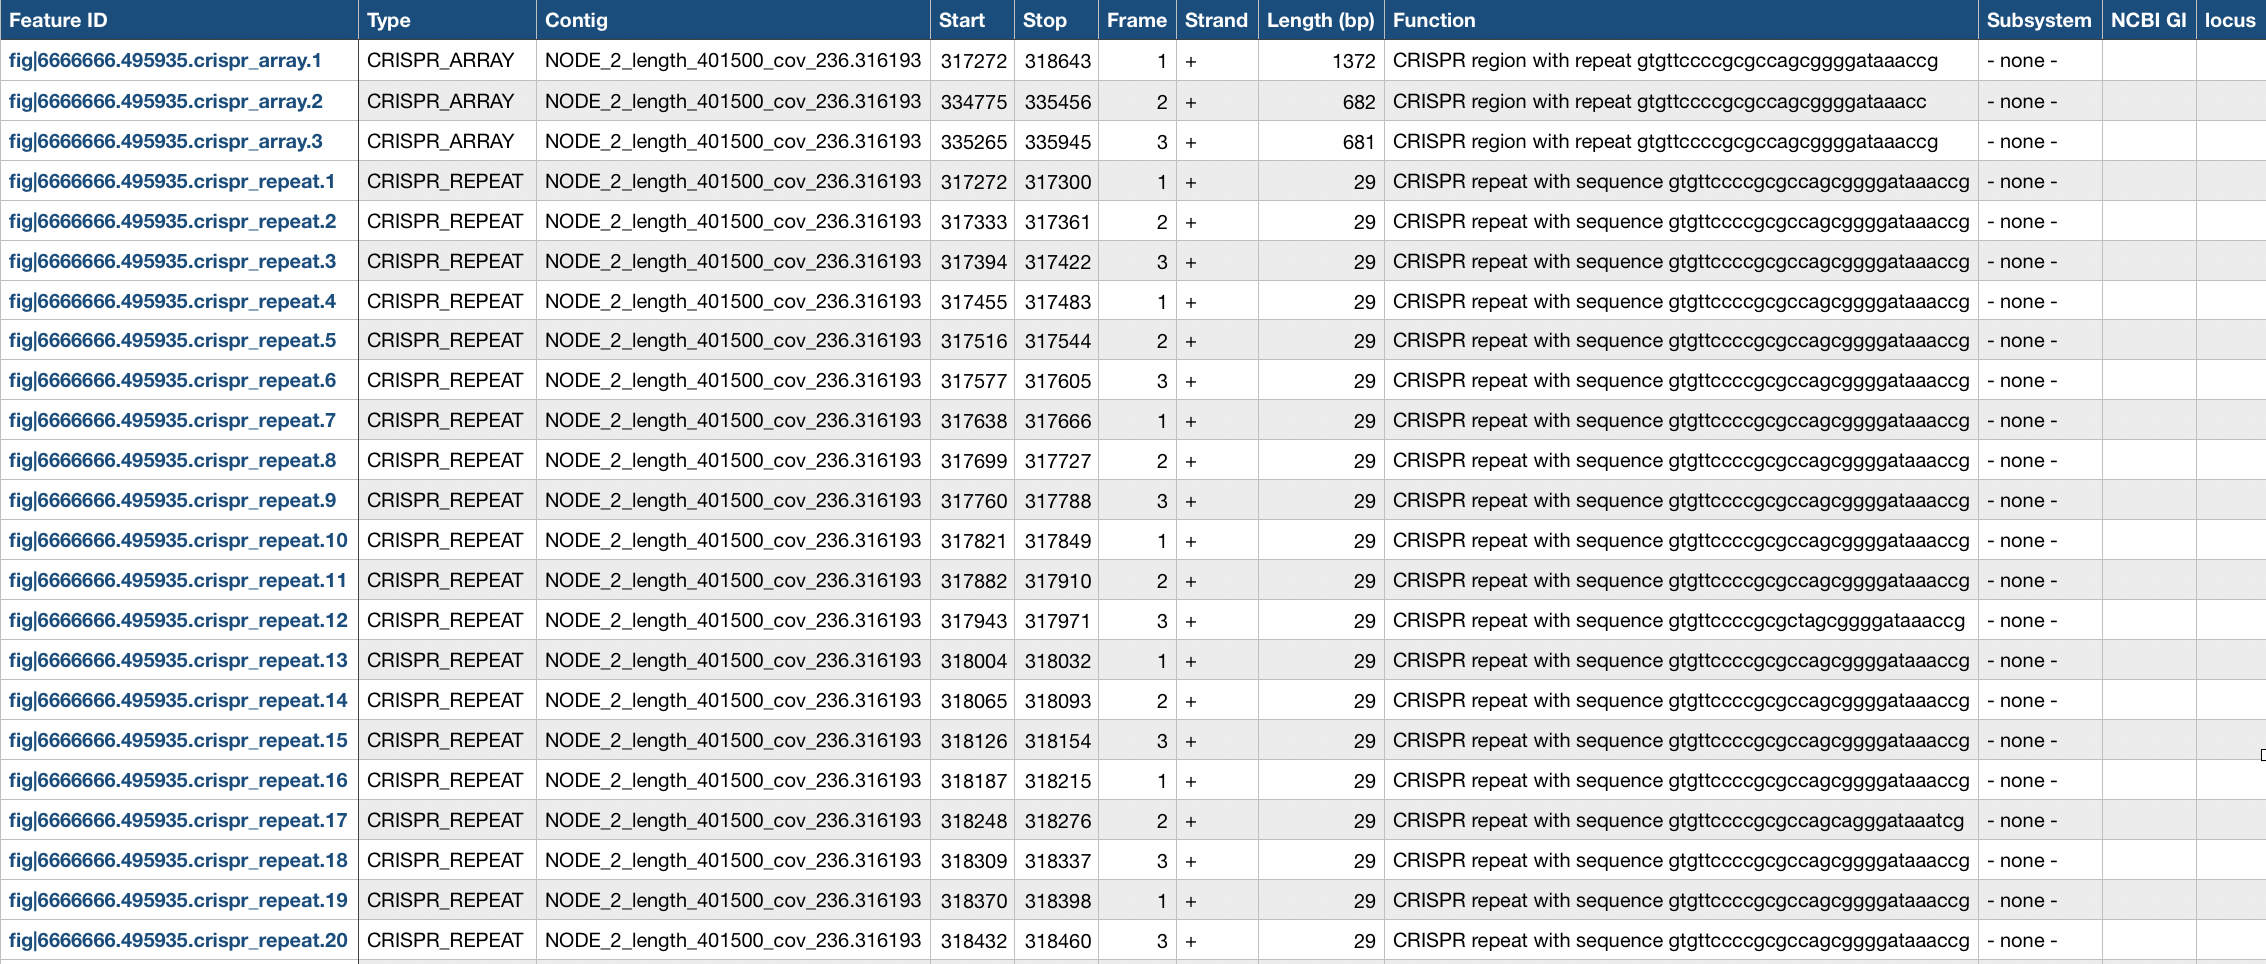
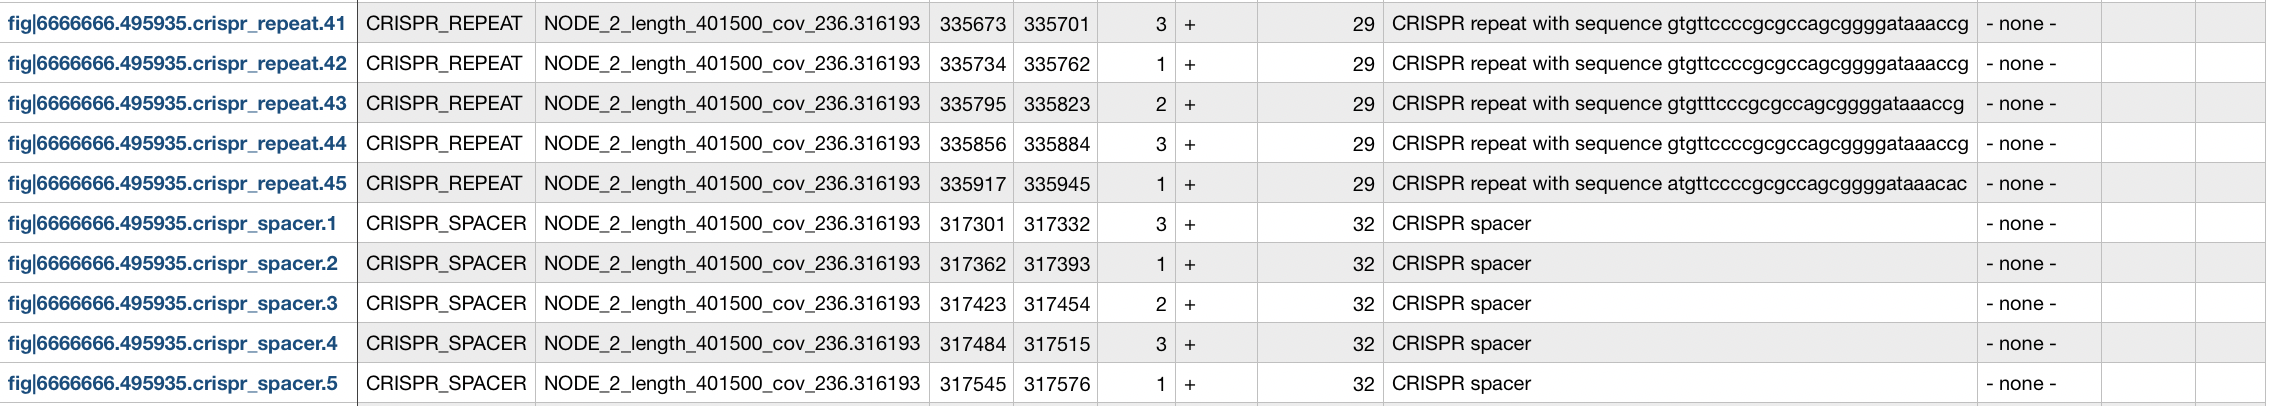
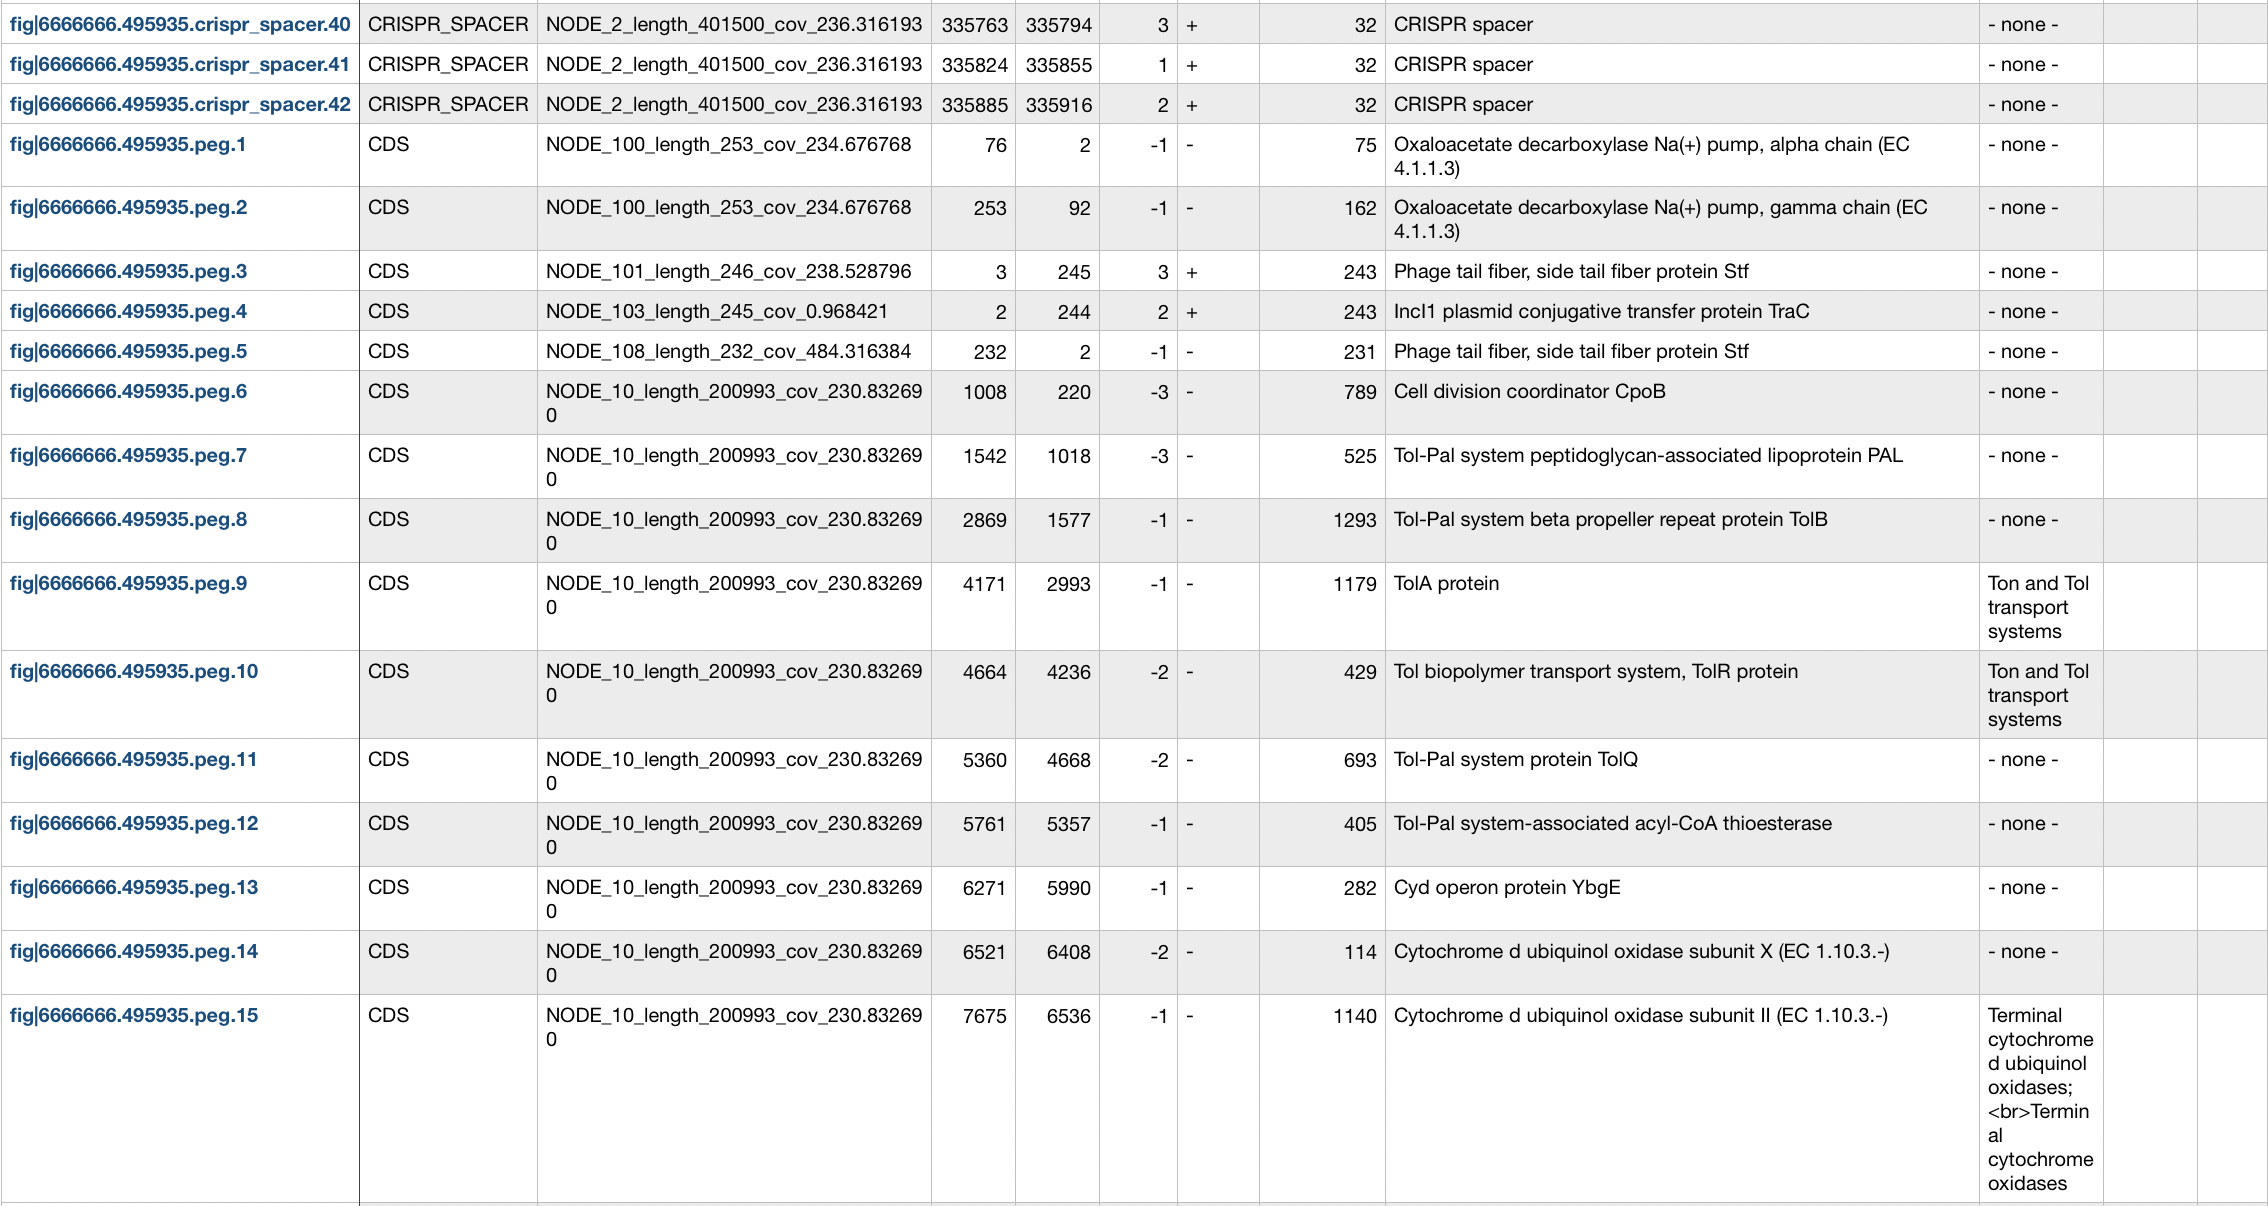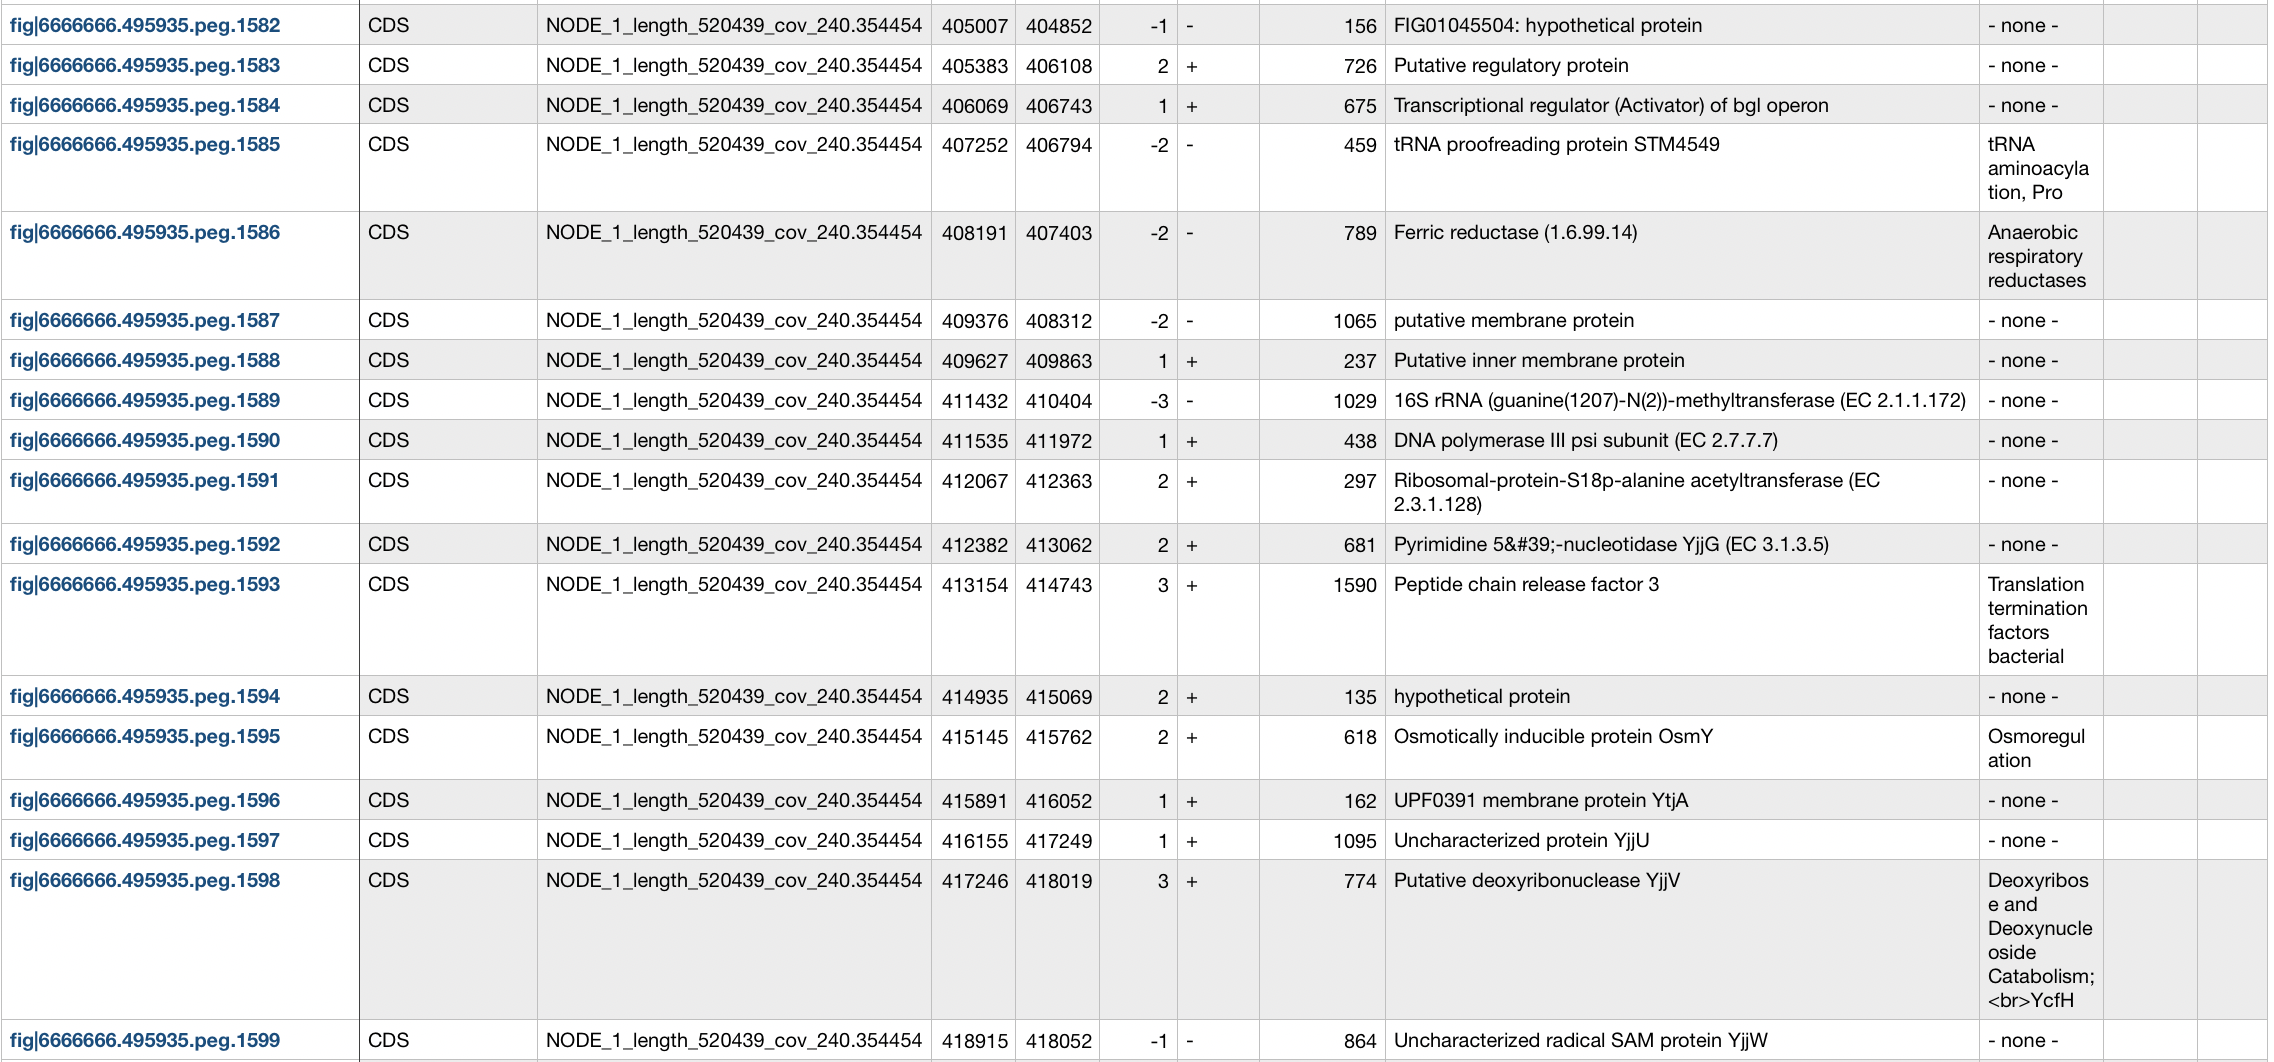
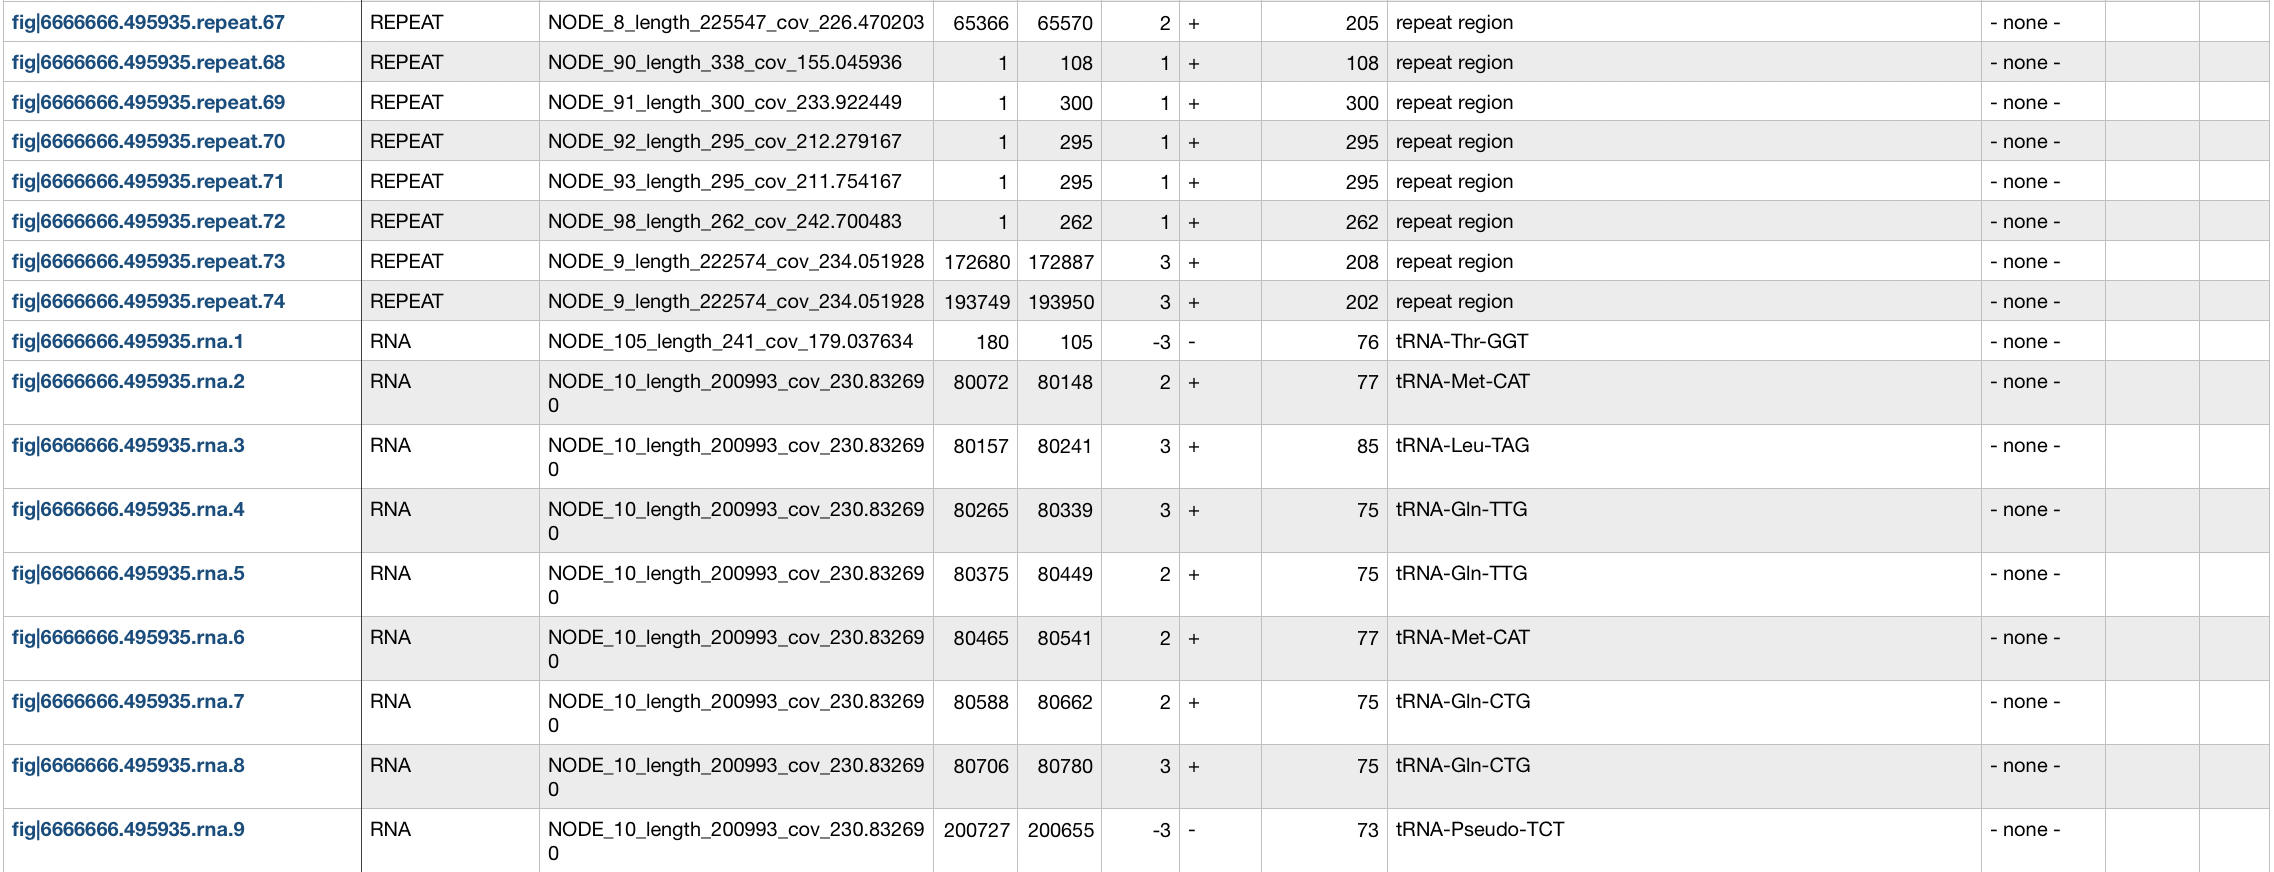

## BASys Annotation & Analysis

Despite uploading our genome to the genome annotation service BASys two days prior, we have yet to receive our annotations. We were told by the GSIs that this was fine, so we proceeded with our analysis using the information from the RAST annotation.

## Final Summary



From the RAST table, we see that around 1/20 of the data corresponds to types CRISPR_ARRAY, CRISPR_REPEAT, and CRISPR_SPACER, which give us more information about the CRISPR array. The CDS data is associated to different subsystems, such as deoxyribose catabolism, osmoregulation, translation termination, etc., telling us about the genetic function of these sequences. Meanwhile, the RNA sequences correspond to different tRNA groups. Since Salmonella enterica was the species-level indentification that SeqMatch suggested for our sequence, we believe the subsystems associated to the coding sequences make sense with this identification, taking into account specific subsystems like "anaerobic respiratory reductases" (Salmonella enterica is known to have aerobic to facultatively anaerobic capabilities).